# Sub-question for Additional dataset

## Import dataset and clean data cleaning

Firstly, we import all the packages and create a copied dataframe of our dataset. We have a look at the first 5 lines of the dataframe.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import chi2 
import scipy.stats as stats
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt
import csv

raw_df = pd.read_csv("../../../datasets/additional/yu.csv")
df = raw_df.copy()
df.head()
df = df[['_startDate', '_value']].copy()
df.head()
new_df_date = df["_startDate"].str.split(" ",n = 1,expand = True)
df.drop('_startDate', inplace=True, axis=1)


df["Date"] = new_df_date[0]
df["Date"] = pd.to_datetime(df["Date"])
#df.drop('_startDate', inplace=True, axis=1)
df["Weekday"] = df['Date'].dt.day_name()
df = df.rename(columns = {"_value":"Steps"})
df["Steps"]
df[pd.to_numeric(df['Steps'], errors='coerce').notnull()]




/var/folders/94/d6zglr4j7fs8fyf3mq_1t2_w0000gn/T/ipykernel_10943/3594694561.py:12: DtypeWarning: Columns (2,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_df = pd.read_csv("../dataset/yu.csv")


,Steps,Date,Weekday
0,175.0,2019-07-26,Friday
1,176.0,2021-06-05,Saturday
2,176.0,2021-06-05,Saturday
3,80.0,2019-07-26,Friday
4,76.0,2021-06-05,Saturday
...,...,...,...
248068,1.0,2022-08-26,Friday
248069,1.0,2022-09-02,Friday
248070,1.0,2022-09-09,Friday
248071,1.0,2022-09-16,Friday


## Hypothesis testing on sub-question

The following code blocks used to get some useful statistics from the dataset. We will use them in our hypothesis testing.

In [11]:
# convert dataframe columns into python lists.
df.Date = df.Date.dt.strftime('%Y-%m-%d')
df_steps = df.Steps.values.tolist()
df_dates = df.Date.values.tolist()
df_Weekday = df.Weekday.values.tolist()

df_list = [df_steps,df_dates,df_Weekday]
list_df = pd.DataFrame(df_list).transpose()
list_df.columns = ['Steps','Date','Weekday']

In [12]:
# Creating the step matrix.
date = ""
step = 0
weekday = ""
first = True
rows = []
for i in range(len(df_dates)):
    if first:
        first = False
        date = df_dates[0]
        step = df_steps[0]
        weekday = df_Weekday[0]
    if date != df_dates[i]:
        rows.append([int(step),date,weekday])
        date = df_dates[i]
        step = df_steps[i]
        weekday = df_Weekday[i]
    else:
        step += df_steps[i]


In [13]:
# Creating the matrix for chi-squared testing
Mon_5k = 0
Tue_5k = 0
Wed_5k = 0
Thu_5k = 0
Fri_5k = 0
Sat_5k = 0
Sun_5k = 0
Mon_10k = 0
Tue_10k = 0
Wed_10k = 0
Thu_10k = 0
Fri_10k = 0
Sat_10k = 0
Sun_10k = 0
mon = 0
tue = 0
wed = 0
thu = 0
fri = 0
sat = 0
sun = 0
mon_small = 0
mon_medium = 0
mon_large = 0
tue_small = 0
tue_medium = 0
tue_large = 0
wed_small = 0
wed_medium = 0
wed_large = 0
thu_small = 0
thu_medium = 0
thu_large = 0
fri_small = 0
fri_medium = 0
fri_large = 0
sat_small = 0
sat_medium = 0
sat_large = 0
sun_small = 0
sun_medium = 0
sun_large = 0

mon_inactive = 0
tue_inactive = 0
wed_inactive = 0
thu_inactive = 0
fri_inactive = 0
sat_inactive = 0
sun_inactive = 0


for i in rows:
    day_step = i[0]
    day_weekday = i[2]
    if (5000<day_step<10000):
        if day_weekday == 'Monday':
            Mon_5k += 1
            mon += 1
            mon_medium += 1
        if day_weekday == 'Tuesday':
            Tue_5k += 1
            tue += 1
            tue_medium += 1
        if day_weekday == 'Wednesday':
            Wed_5k += 1
            wed += 1
            wed_medium += 1
        if day_weekday == 'Thursday':
            Thu_5k += 1
            thu += 1
            thu_medium += 1
        if day_weekday == 'Friday':
            Fri_5k += 1
            fri += 1
            fri_medium += 1
        if day_weekday == 'Saturday':
            Sat_5k += 1
            sat += 1
            sat_medium += 1
        if day_weekday == 'Sunday':
            Sun_5k += 1
            sun += 1
            sun_medium += 1
    if (day_step>10000):
        if day_weekday == 'Monday':
            Mon_10k += 1
            mon += 2
            mon_large += 1
        if day_weekday == 'Tuesday':
            Tue_10k += 1
            tue += 2
            tue_large += 1
        if day_weekday == 'Wednesday':
            Wed_10k += 1
            wed += 2
            wed_large += 1
        if day_weekday == 'Thursday':
            Thu_10k += 1
            thu += 2
            thu_large += 1
        if day_weekday == 'Friday':
            Fri_10k += 1
            fri += 2
            fri_large += 1
        if day_weekday == 'Saturday':
            Sat_10k += 1
            sat += 2
            sat_large+= 1
        if day_weekday == 'Sunday':
            Sun_10k += 1
            sun += 2
            sun_large += 1
    if (day_step < 5000):
        if day_weekday == 'Monday':
            mon_small += 1
        if day_weekday == 'Tuesday':
            tue_small += 1
        if day_weekday == 'Wednesday':
            wed_small += 1
        if day_weekday == 'Thursday':
            thu_small += 1
        if day_weekday == 'Friday':
            fri_small += 1
        if day_weekday == 'Saturday':
            sat_small += 1
        if day_weekday == 'Sunday':
            sun_small += 1
    if (day_step < 3000):
        if day_weekday == 'Monday':
            mon_inactive += 1
        if day_weekday == 'Tuesday':
            tue_inactive += 1
        if day_weekday == 'Wednesday':
            wed_inactive += 1
        if day_weekday == 'Thursday':
            thu_inactive += 1
        if day_weekday == 'Friday':
            fri_inactive += 1
        if day_weekday == 'Saturday':
            sat_inactive += 1
        if day_weekday == 'Sunday':
            sun_inactive += 1
ls_score = [mon,tue,wed,thu,fri,sat,sun]
ls_score_5k = [Mon_5k,Tue_5k,Wed_5k,Thu_5k,Fri_5k,Sat_5k,Sun_5k]
ls_score_10k = [Mon_10k,Tue_10k,Wed_10k,Thu_10k,Fri_10k,Sat_10k,Sun_10k]
mon_ls = ["Mon",mon_small,mon_medium,mon_large]
tue_ls = ["Tue",tue_small,tue_medium,tue_large]
wed_ls = ["Wed",wed_small,wed_medium,wed_large]
thu_ls = ["Thu",thu_small,thu_medium,thu_large]
fri_ls = ["Fri",fri_small,fri_medium,fri_large]
sat_ls = ["Sat",sat_small,sat_medium,sat_large]
sun_ls = ["Sun",sun_small,sun_medium,sun_large]
ls_mon = [Mon_5k,Mon_10k]
ls_tue = [Tue_5k,Tue_10k]
ls_wed = [Wed_5k,Wed_10k]
ls_thu = [Thu_5k,Thu_10k]
ls_fri = [Fri_5k,Fri_10k]
ls_sat = [Sat_5k,Sat_10k]
ls_sun = [Sun_5k,Sun_10k]
mon_act = ["Monday",mon_inactive,mon_large]
tue_act = ["Tuesday",tue_inactive,tue_large]
wed_act = ["Wednesday",wed_inactive,wed_large]
thu_act = ["Thursday",thu_inactive, thu_large]
fri_act = ["Friday",fri_inactive,fri_large]
sat_act = ["Saturday",sat_inactive,sat_large]
sun_act = ["Sunday",sun_inactive,sun_large]

Firstly, we perform the chi-square hypothesis testing on two variables. One is 5k and 10k days and the other variable is weekday.
Our assumption H0 would be these two variables are independent from each other. The significant level is set to be 0.05.

In [14]:
# chi-square hypothesis testing
table = [ls_score_5k,ls_score_10k]
table_2 = [ls_mon,ls_tue,ls_wed,ls_thu,ls_fri,ls_sat,ls_sun]
stat, p, dof, expected = chi2_contingency(table_2)
print('dof=%d' % dof)
print(expected)
print("p-value = ", end = "")
print(p)

dof=6
[[31.61904762 16.38095238]
 [38.86507937 20.13492063]
 [30.96031746 16.03968254]
 [33.5952381  17.4047619 ]
 [33.5952381  17.4047619 ]
 [38.86507937 20.13492063]
 [41.5        21.5       ]]
p-value = 0.2876948732076428


As we can see here, the pvalue is larger than 0.05 so we retain the hypothesis.

We then perform a chi-square testing on one cateogircal variable for weekday. Our assumption H0 would be there is no difference exist on different week day. The significant level is also set to be 0.05.

In [16]:
# chi-square hypothesis testing for one categorical variable
avg = (mon+tue+wed+thu+fri+sat+sun)/7 # a mistake, I assumed the number of days of each weekday would be the same.
expected2 = [avg,avg,avg,avg,avg,avg,avg]

expected_5k = []
expected_10k = []
for i in expected:
    expected_5k.append(i[0])
    expected_10k.append(i[1])
observed_5k = ls_score_5k
observed_10k = ls_score_10k
statis, p = stats.chisquare(f_obs=ls_score, f_exp=expected2)
print("Chi-square hypothesis testing statistics for weekday")
print("p-value = ", end = "")
print(p)



Chi-square hypothesis testing statistics for weekday
p-value = 0.297611791216374


We can conclude there is no significant difference between each weekday as p value is 0.29 which is much larger than 0.05.

## Visualization of sub-question

### Visualization for hypothesis testing

[72.42857142857143, 72.42857142857143, 72.42857142857143, 72.42857142857143, 72.42857142857143, 72.42857142857143, 72.42857142857143]
[68, 80, 59, 66, 69, 85, 80]


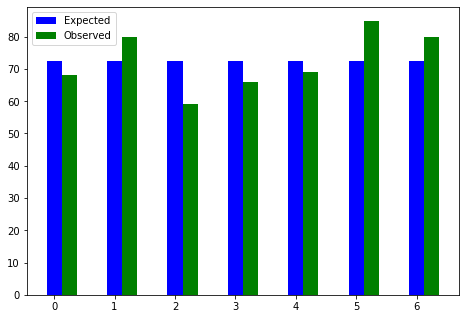

In [17]:
# graphs of expected value and observed value

table_1 = [mon,tue,wed,thu,fri,sat,sun]
print(expected2)
print(ls_score)
X = np.arange(7)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, expected2, color = 'b', width = 0.25)
ax.bar(X + 0.25, ls_score, color = 'g', width = 0.25)
ax.legend(labels=['Expected', 'Observed'])



From the graph, we can see there is no large difference between weekday. However, we can see a pattern which is increasing between Wednesday to Saturday.

### Visualization for 0-5k, 5-10k, and >10k

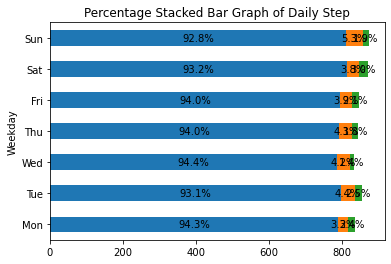

In [19]:
products_list = [mon_ls,tue_ls,wed_ls,thu_ls,fri_ls,sat_ls,sun_ls]
df = pd.DataFrame (products_list, columns = ['Weekday', '< 5000',"5000-10000","> 10000"])
df.plot(
  x = 'Weekday', 
  kind = 'barh', 
  stacked = True, 
  title = 'Percentage Stacked Bar Graph of Daily Step', 
  mark_right = True,
  legend = False)
  
df_total = df["< 5000"] + df["5000-10000"] + df["> 10000"]
df_rel = df[df.columns[1:]].div(df_total, 0)*100
  
for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(df.iloc[:, 1:].cumsum(1)[n], 
                                         df[n], df_rel[n])):
        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%', 
                 va = 'center', ha = 'center')

This graph shows percentage of different step range on each weekday. We can see for this participant, it is hard to see any pattern. Most of the days are less than 5k steps.

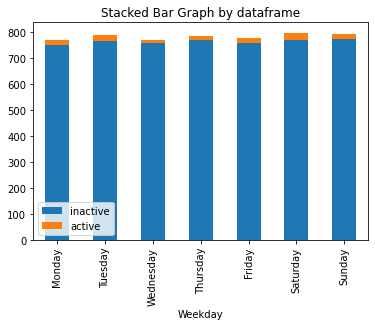

In [20]:
# mon_act = [mon_inactive,mon_large]
# tue_act = [tue_inactive,tue_large]
# wed_act = [wed_inactive,wed_large]
# thu_act = [thu_inactive, thu_large]
# fri_act = [fri_inactive,fri_large]
# sat_act = [sat_inactive,sat_large]
# sun_act = [sun_inactive,sun_large]
act_list = [mon_act,tue_act,wed_act,thu_act,fri_act,sat_act,sun_act]
df = pd.DataFrame (act_list, columns = ['Weekday','inactive', 'active'])
 
# plot data in stack manner of bar type
df.plot(x='Weekday', kind='bar', stacked=True,
        title='Stacked Bar Graph by dataframe')
plt.show()

